# Introducción a las APIs

Cuando queremos extraer datos de internet la forma más complicada es mediante el scraping y éste debe ser el último recurso.

Antes de eso lo ideal es comprobar si la web o servicio del que queremos extraer datos dispone de una API. API significa "interfaz de programación de aplicaciones" y son protocolos y mecanismos que permiten a los softwares intercambiar información.

Las APIs pueden ser públicas o de pago. Algunas además necesitan registro y autenticación.

La información además puede venir en diferentes formatos. El formato mas común actualmente es [JSON](https://developer.mozilla.org/es/docs/Learn/JavaScript/Objects/JSON), aunque antes se usaba más [XML](https://es.wikipedia.org/wiki/Extensible_Markup_Language).

En github podemos encontrar el repositorio [public-apis](https://github.com/public-apis/public-apis) donde podremos consultar cientos de APIs donde obtener datos.

Existen diferentes tipos de APIs: Soap, WPC, Websocket, REST... Vamos a entrar sólo en las REST que son las más populares.


## REST

REST significa transferencia de estado representacional y es la forma más popular de comunicación de APIs hoy en día. Esta forma de comunicación consiste en que un cliente realiza una una solicitud a un servidor como datos, el servidor realiza un conjunto de funciones definidas y devuelve unos datos de salida.

REST define un conjunto de funciones. Las más importantes son GET, PUT, PATCH, POST y DELETE.

Vamos a centrarnos en las peticiones GET.

## Peticiones GET

Las peticiones GET sirven para pedir información. Si la petición ha ido bien el servidor devuelve un [código 200](https://developer.mozilla.org/es/docs/Web/HTTP/Status) y la información que hemos pedido.

Tomemos ahora el ejemplo de un navegador web. Cuando en un navegador le indicamos una dirección web lo que está pasando es que nuestro navegador está haciendo una petición GET a esa página. Si todo va bien, el servidor al que le hacemos la petición devolverá el código HTML que usará el navegador para construir la web.

Veamos como hacer esto con Python usando la [librería requests](https://requests.readthedocs.io):

In [1]:
import requests

x = requests.get("http://www.google.es")

Si hacemos un print de la petición que hemos hecho nos devolverá el código de nuestra petición.

In [2]:
print(x)

<Response [200]>


Y si imprimiemos la propiedad text nos devolverá en formato texto lo que nos ha devuelto el servidor.

In [3]:
x.text

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="es"><head><meta content="Google.es permite acceder a la información mundial en castellano, catalán, gallego, euskara e inglés." name="description"><meta content="noodp, " name="robots"><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/logos/doodles/2024/seasonal-holidays-2024-6753651837110333-law.gif" itemprop="image"><meta content="Temporada navideña 2024" property="twitter:title"><meta content="¡Felices fiestas! #GoogleDoodle" property="twitter:description"><meta content="¡Felices fiestas! #GoogleDoodle" property="og:description"><meta content="summary_large_image" property="twitter:card"><meta content="@GoogleDoodles" property="twitter:site"><meta content="https://www.google.com/logos/doodles/2024/seasonal-holidays-2024-6753651837110333-2xa.gif" property="twitter:image"><meta content="https://www.google.com/logos/doodles/2024/seasonal-holidays-2024-6753651837110333-2xa.gif"

Vamos ahora a ver como trabajar con una API de internet para extraer datos. Tras examinar el repositorio de [public-apis](https://github.com/public-apis/public-apis) vamos a usar por ejemplo la API de [arbeitnow](http://www.arbeitnow.com), un buscador de empleo alemán. 

La documentación de la API la podemos encontrar en la dirección https://documenter.getpostman.com/view/18545278/UVJbJdKh

Vamos ahora a hacer la petición utilizando la librería requests.

In [4]:
x = requests.get("https://arbeitnow.com/api/job-board-api")
print(x)

<Response [200]>


Para ver el JSON con los datos que recibimos tendremos que utilizar el método json.

In [5]:
x.json()

{'data': [{'slug': 'flexible-schedule-media-search-analyst-germany-mfd-berlin-208211',
   'company_name': 'TELUS Digital',
   'title': 'Flexible schedule - Media Search Analyst (Germany) m,f,d',
   'description': '<p>Ready to say goodbye to the boring, traditional 9-5 routine and embrace a dynamic and exciting work environment that puts you in control? If you are an <strong>iOS device user</strong> who has a passion for Music, Video, and Apple products, this opportunity offers you the flexibility to set your schedule and complete exciting tasks using an innovative web-based evaluation tool!</p>\n<h2>Aufgaben</h2>\n<ul>\n<li>In this role, you will be doing a comprehensive assessment of diverse task categories, encompassing music, video, and home pod evaluations spanning various media domains</li>\n<li>Analyzing and evaluating search outcomes for App Store Content and conducting research using online tools to assess and validate query accuracy and intent by applying market expertise in c

El método json nos devuelve un diccionario

In [6]:
type(x.json())

dict

Así que podremos usar los métodos de los diccionarios para manipular los datos:

In [7]:
x.json().keys()

dict_keys(['data', 'links', 'meta'])

In [8]:
x.json()["data"][0]

{'slug': 'flexible-schedule-media-search-analyst-germany-mfd-berlin-208211',
 'company_name': 'TELUS Digital',
 'title': 'Flexible schedule - Media Search Analyst (Germany) m,f,d',
 'description': '<p>Ready to say goodbye to the boring, traditional 9-5 routine and embrace a dynamic and exciting work environment that puts you in control? If you are an <strong>iOS device user</strong> who has a passion for Music, Video, and Apple products, this opportunity offers you the flexibility to set your schedule and complete exciting tasks using an innovative web-based evaluation tool!</p>\n<h2>Aufgaben</h2>\n<ul>\n<li>In this role, you will be doing a comprehensive assessment of diverse task categories, encompassing music, video, and home pod evaluations spanning various media domains</li>\n<li>Analyzing and evaluating search outcomes for App Store Content and conducting research using online tools to assess and validate query accuracy and intent by applying market expertise in conjunction with 

In [9]:
type(x.json()["data"])

list

In [10]:
base_web = "https://www.arbeitnow.com/api/job-board-api?page="

lista = []

n = 1

while True and n < 1000:
    page_data = requests.get(base_web + str(n)).json()["data"]
    if not page_data:
        break
    lista += page_data
    n += 1

La clave "data" contiene una lista con los datos de cada uno de los empleos. Hagamos un mini análisis con los datos, veamos en que ciudad surgen más empleos y si el número de habitantes tiene algo que ver.

Vamos a iterar por cada uno de los elementos de data, veamos la localización y contemos cuantas veces se repite cada una de ellas.

In [11]:
towns = {}

for job in lista:
    location_job = job.get("location")
    if location_job in towns:
        towns[location_job] += 1
    else:
        towns[location_job] = 1

In [12]:
towns

{'Berlin': 230,
 'Potsdam': 3,
 'Eschborn': 3,
 'Hamburg': 83,
 'Frankfurt': 37,
 'Karlsruhe': 26,
 'Zetel': 1,
 'Passau': 1,
 'Mannheim': 17,
 'Cologne': 62,
 'Ingolstadt': 3,
 'Aachen': 4,
 'Munich': 137,
 'Bremen': 13,
 'Düsseldorf': 41,
 'Varel': 1,
 'Soltau': 1,
 'Neckarsulm': 1,
 'Dresden': 14,
 'Erfurt': 2,
 'Taucha': 2,
 'Straubing': 1,
 'Nuremberg': 9,
 'Hanover': 15,
 'Magdeburg': 4,
 'Grünwald': 1,
 'Halle (Saale)': 2,
 'Donaueschingen': 1,
 'Mainz': 6,
 'Berlin, Berlin, Germany': 21,
 'Koblenz': 5,
 'Radeberg': 1,
 'Würzburg': 6,
 'Rostock': 8,
 'Burgkirchen an der Alz': 1,
 'Freiberg': 1,
 'Münster': 5,
 'Dinslaken': 1,
 'Hamelin': 1,
 'Mühlhausen': 1,
 'Pfaffenhofen an der Ilm': 1,
 'Vallendar': 1,
 'Stuttgart': 66,
 'Ludwigsburg': 2,
 'Essen': 7,
 'Osnabrück': 5,
 'Ulm': 4,
 'Achern': 4,
 'Fürth': 5,
 'Ammersbek': 2,
 'Giessen': 1,
 'Eggenfelden': 1,
 'Bielefeld': 3,
 'Regensburg': 10,
 'Amberg': 1,
 'Ludwigshafen': 1,
 'Owingen': 1,
 'Grünstadt': 1,
 'Weiden in der Ober

Ahora tenemos que ver los habitantes de cada una de las ciudades. Vamos a extraer los datos de población de un [artículo](https://es.wikipedia.org/wiki/Anexo:Ciudades_de_Alemania_por_poblaci%C3%B3n) de la wikipedia, utilizando para ello la librería pandas.

In [13]:
import pandas as pd

wiki = "https://es.wikipedia.org/wiki/Anexo:Ciudades_de_Alemania_por_poblaci%C3%B3n"

data = pd.read_html(wiki)

data

[    0                           1
 0 NaN             Capital Federal
 1 NaN  Capital de Estado Federado,
     Rango  Escudo          Nombre Población en 1990 Población en 2000  \
 0       1     NaN          Berlín         3 433 695         3 382 169   
 1       2     NaN        Hamburgo         1 652 363         1 715 392   
 2       3     NaN          Múnich         1 229 026         1 210 223   
 3       4     NaN         Colonia           953 551           962 884   
 4       5     NaN       Fráncfort           644 865           646 550   
 ..    ...     ...             ...               ...               ...   
 77     78     NaN          Siegen           109 174           108 476   
 78     79     NaN       Gütersloh            86 807            95 156   
 79     80     NaN      Hildesheim           105 291           103 909   
 80     81     NaN           Hanau            88 294            88 637   
 81     82     NaN  Kaiserslautern            99 351            99 825   
 
    

Podemos ver como son extraídas cada una de las tablas. La que nos interesa es la segunda, que es la que contiene los datos de población.

In [14]:
data[1]

,Rango,Escudo,Nombre,Población en 1990,Población en 2000,Población en 2005,Población en 2010[1]​,Población en 2020,Población en 2022,Área (km²),Pob. por km²,Crecimiento %,Estado (Bundesland),Año en que superó 100 000 hab.
0,1,NaN,Berlín,3 433 695,3 382 169,3 395 189,3 460 725,3 664 088,3 755 251,89182,3807.0,6.0,Berlín,1740
1,2,NaN,Hamburgo,1 652 363,1 715 392,1 743 627,1 786 448,1 852 478,1 892 122,75524,2309.0,27.0,Hamburgo,1787
2,3,NaN,Múnich,1 229 026,1 210 223,1 259 677,1 353 186,1 488 202,1 512 491,31046,4057.0,68.0,Baviera,1854
3,4,NaN,Colonia,953 551,962 884,983 347,1 007 119,1 083 498,1 084 831,40515,2427.0,35.0,Renania del Norte-Westfalia,1855
4,5,NaN,Fráncfort,644 865,646 550,651 899,679 664,764 104,773 068,24831,2625.0,14.0,Hesse,1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,NaN,Siegen,109 174,108 476,106 293,103 424,101 943,102 560,11467,927.0,-34.0,Renania del Norte-Westfalia,1975
78,79,NaN,Gütersloh,86 807,95 156,-,96404,100 664,102 393,11202,NaN,NaN,Renania del Norte-Westfalia,2018
79,80,NaN,Hildesheim,105 291,103 909,102 575,102 794,101 055,101 858,9257,1108.0,-21.0,Baja Sajonia,1974
80,81,NaN,Hanau,88 294,88 637,-,88.637,97 137,101 364,7674,NaN,NaN,Hesse,2022


Y veamos el nombre de sus columnas

In [15]:
data[1].columns

Index(['Rango', 'Escudo', 'Nombre', 'Población en 1990', 'Población en 2000',
       'Población en 2005', 'Población en 2010[1]​', 'Población en 2020',
       'Población en 2022', 'Área (km²)', 'Pob. por km²', 'Crecimiento %',
       'Estado (Bundesland)', 'Año en que superó 100 000 hab.'],
      dtype='object')

Vamos a quedarnos con la tabla con los datos que queremos y vamos a renombrar las columnas con unos nombres con los que sea más fácil de trabajar.

In [16]:
data = data[1]

In [17]:
data = data[["Nombre", "Población en 2022"]]
data.columns = ["nombre", "poblacion"]
print(data)

            nombre  poblacion
0           Berlín  3 755 251
1         Hamburgo  1 892 122
2           Múnich  1 512 491
3          Colonia  1 084 831
4        Fráncfort    773 068
..             ...        ...
77          Siegen    102 560
78       Gütersloh    102 393
79      Hildesheim    101 858
80           Hanau    101 364
81  Kaiserslautern    101 228

[82 rows x 2 columns]


Para poder unir las tablas necesitamos que los nombres de las ciudades de la tabla de wikipedia y los de la API coincidan. Vamos a intentar estandarizar los valores eliminando los caracteres extraños. Para ello utilizaremos la librería unidecode.

In [18]:
from unidecode import unidecode
data["normalized_nombre"] = data["nombre"].apply(unidecode)

C:\Users\PC\AppData\Local\Temp/ipykernel_11772/3388093331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["normalized_nombre"] = data["nombre"].apply(unidecode)


In [19]:
data

,nombre,poblacion,normalized_nombre
0,Berlín,3 755 251,Berlin
1,Hamburgo,1 892 122,Hamburgo
2,Múnich,1 512 491,Munich
3,Colonia,1 084 831,Colonia
4,Fráncfort,773 068,Francfort
...,...,...,...
77,Siegen,102 560,Siegen
78,Gütersloh,102 393,Gutersloh
79,Hildesheim,101 858,Hildesheim
80,Hanau,101 364,Hanau


Creemos ahora un dataframe con los datos que hemos obtenido de la API.

In [20]:
data_jobs = pd.DataFrame(towns.items(), columns=["nombre", "n_jobs"])
data_jobs

,nombre,n_jobs
0,Berlin,230
1,Potsdam,3
2,Eschborn,3
3,Hamburg,83
4,Frankfurt,37
...,...,...
256,Lünen,1
257,Rheda-Wiedenbrück,1
258,Landsberg am Lech,1
259,"Mannheim, Baden-Württemberg, Germany",1


Eliminemos los caracteres raros de los datos de la API.

In [21]:
data_jobs["normalized_nombre"] = data_jobs["nombre"].apply(unidecode)
data_jobs

,nombre,n_jobs,normalized_nombre
0,Berlin,230,Berlin
1,Potsdam,3,Potsdam
2,Eschborn,3,Eschborn
3,Hamburg,83,Hamburg
4,Frankfurt,37,Frankfurt
...,...,...,...
256,Lünen,1,Lunen
257,Rheda-Wiedenbrück,1,Rheda-Wiedenbruck
258,Landsberg am Lech,1,Landsberg am Lech
259,"Mannheim, Baden-Württemberg, Germany",1,"Mannheim, Baden-Wurttemberg, Germany"


Y ahora unamos los dos DFs usando los nombres sin carateres raros

In [22]:
data_joined = data_jobs.merge(data, on="normalized_nombre")
data_joined

,nombre_x,n_jobs,normalized_nombre,nombre_y,poblacion
0,Berlin,230,Berlin,Berlín,3 755 251
1,Potsdam,3,Potsdam,Potsdam,185 750
2,Karlsruhe,26,Karlsruhe,Karlsruhe,308 707
3,Mannheim,17,Mannheim,Mannheim,315 554
4,Ingolstadt,3,Ingolstadt,Ingolstadt,141 029
5,Munich,137,Munich,Múnich,1 512 491
6,Bremen,13,Bremen,Bremen,569 396
7,Düsseldorf,41,Dusseldorf,Düsseldorf,629 047
8,Erfurt,2,Erfurt,Erfurt,214 969
9,Nuremberg,9,Nuremberg,Núremberg,523 026


In [23]:
data_joined["poblacion"] = data_joined["poblacion"].str.replace(" ", "")
data_joined["poblacion"] = data_joined["poblacion"].str.replace(".", "")
data_joined["poblacion"] = data_joined["poblacion"].astype(int)
data_joined.sort_values("poblacion", ascending=True, inplace=True)
data_joined

C:\Users\PC\AppData\Local\Temp/ipykernel_11772/2377118275.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_joined["poblacion"] = data_joined["poblacion"].str.replace(".", "")


,nombre_x,n_jobs,normalized_nombre,nombre_y,poblacion
42,Hanau,1,Hanau,Hanau,101364
30,Gütersloh,6,Gutersloh,Gütersloh,102393
38,Salzgitter,1,Salzgitter,Salzgitter,104548
29,Jena,1,Jena,Jena,111191
37,Bremerhaven,1,Bremerhaven,Bremerhaven,115468
28,Erlangen,1,Erlangen,Erlangen,116562
39,Reutlingen,2,Reutlingen,Reutlingen,117547
46,Pforzheim,1,Pforzheim,Pforzheim,127849
40,Heilbronn,1,Heilbronn,Heilbronn,128334
16,Ulm,4,Ulm,Ulm,128928


<AxesSubplot:xlabel='poblacion', ylabel='n_jobs'>

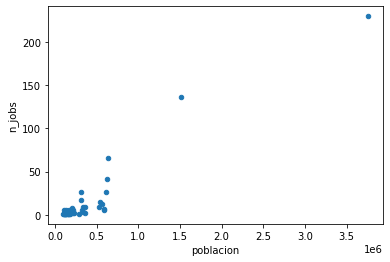

In [24]:
data_joined.plot.scatter("poblacion", "n_jobs")

## Comando para instalar librerías

In [25]:
%%capture
import sys

if 'unidecode' not in sys.modules:
    !{sys.executable} -m pip install unidecode

# Ejercicios

1) Extraer las ciudades de las 1200 primeras ofertas de arbeitnow

2) Buscar una API en public-apis y hacer un pequeño script que extraiga los datos. Si quieres un reto puedes intentar utilizar una API con contraseña